In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13690945482248170580
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5748293632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12556210855438591097
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.datasets import cifar100
from keras.utils import to_categorical

# Load CIFAR100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

print(train_labels.shape, test_labels.shape)



(50000, 100) (10000, 100)


In [3]:
# AlexNet model architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
# Add Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(100))  # Changed to 100 for CIFAR-100
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [4]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# model.fit(train_images, train_labels, epochs=90, 
#           validation_data=(test_images, test_labels))

history = model.fit(train_images, train_labels, epochs=90, 
                    validation_data=(test_images, test_labels))

Epoch 1/90
1563/1563 [==============================] - 16s 8ms/step - loss: 4.9661 - accuracy: 0.0138 - val_loss: 4.3640 - val_accuracy: 0.0609
Epoch 2/90
1563/1563 [==============================] - 13s 8ms/step - loss: 4.7086 - accuracy: 0.0230 - val_loss: 4.1882 - val_accuracy: 0.0911
Epoch 3/90
1563/1563 [==============================] - 13s 8ms/step - loss: 4.5065 - accuracy: 0.0323 - val_loss: 4.0887 - val_accuracy: 0.1079
Epoch 4/90
1563/1563 [==============================] - 13s 8ms/step - loss: 4.3806 - accuracy: 0.0392 - val_loss: 4.0166 - val_accuracy: 0.1230
Epoch 5/90
1563/1563 [==============================] - 13s 8ms/step - loss: 4.2869 - accuracy: 0.0452 - val_loss: 3.9608 - val_accuracy: 0.1252
Epoch 6/90
1563/1563 [==============================] - 13s 8ms/step - loss: 4.2066 - accuracy: 0.0544 - val_loss: 3.9473 - val_accuracy: 0.1251
Epoch 7/90
1563/1563 [==============================] - 13s 8ms/step - loss: 4.1449 - accuracy: 0.0587 - val_loss: 3.9870 - val_ac

1563/1563 [==============================] - 13s 8ms/step - loss: 2.9096 - accuracy: 0.2665 - val_loss: 3.2956 - val_accuracy: 0.2266
Epoch 58/90
1563/1563 [==============================] - 13s 8ms/step - loss: 2.8962 - accuracy: 0.2706 - val_loss: 3.2119 - val_accuracy: 0.2449
Epoch 59/90
1563/1563 [==============================] - 13s 8ms/step - loss: 2.8757 - accuracy: 0.2739 - val_loss: 3.1240 - val_accuracy: 0.2472
Epoch 60/90
1563/1563 [==============================] - 13s 8ms/step - loss: 2.8520 - accuracy: 0.2768 - val_loss: 3.3501 - val_accuracy: 0.2184
Epoch 61/90
1563/1563 [==============================] - 13s 8ms/step - loss: 2.8366 - accuracy: 0.2791 - val_loss: 3.6373 - val_accuracy: 0.1663
Epoch 62/90
1563/1563 [==============================] - 13s 8ms/step - loss: 2.8134 - accuracy: 0.2883 - val_loss: 3.1663 - val_accuracy: 0.2411
Epoch 63/90
1563/1563 [==============================] - 13s 8ms/step - loss: 2.7947 - accuracy: 0.2908 - val_loss: 3.6337 - val_accurac

In [5]:
#cifar100, relu 대신 sigmoid 사용

accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


313/313 [==============================] - 1s 3ms/step - loss: 3.5445 - accuracy: 0.2066
Test loss: 3.544478178024292
Test accuracy: 0.20659999549388885


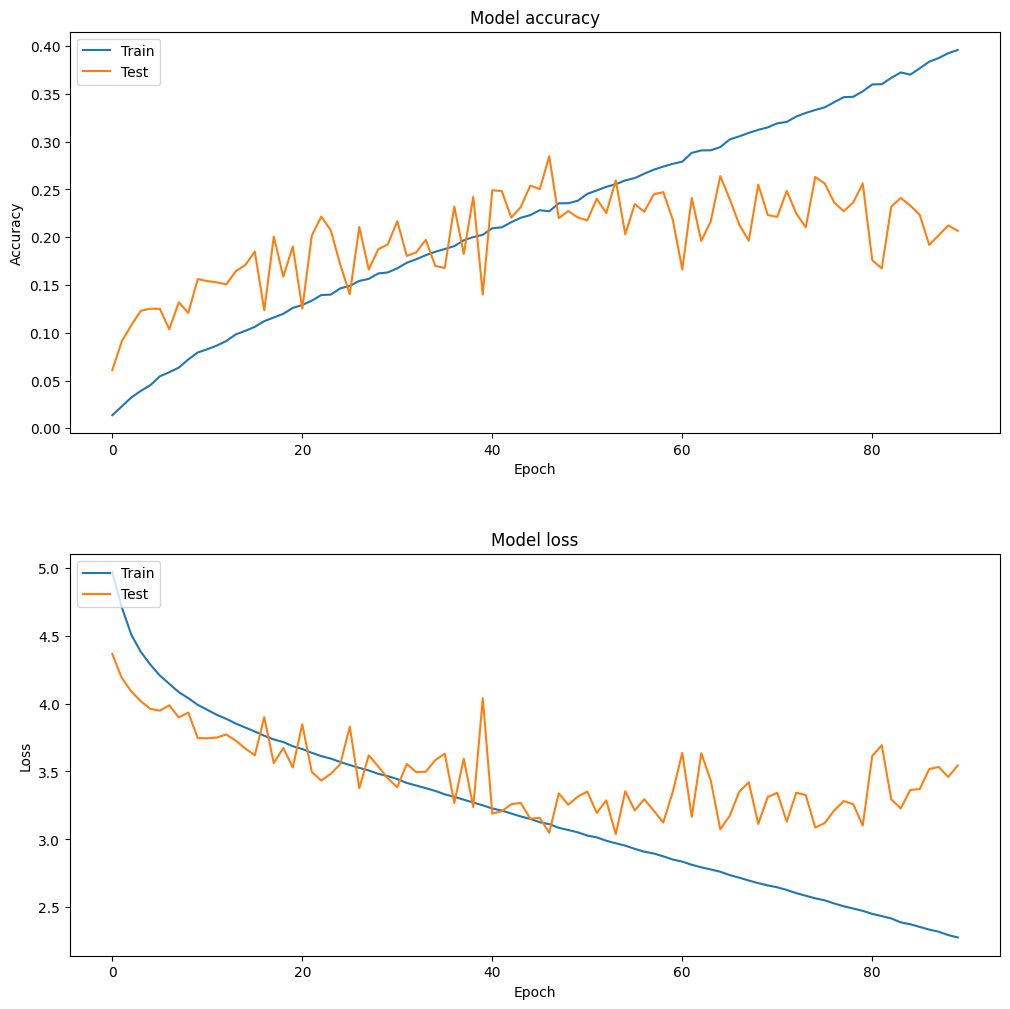

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.show()
